# Email Campaigns based on Segments

In [29]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
%matplotlib inline

In [4]:
psautogroup_rfm=pd.read_csv('psautogroup_rfm_output.csv')
amcautogroup_rfm=pd.read_csv('amcautogroup_rfm_output.csv')

/Users/naga/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
customer_amc=pd.read_json('Customer_amc.json',lines=True)
customer_ps=pd.read_json('Customer_ps.json',lines=True)

### RFM Analysis Output

In [9]:
psautogroup_rfm.head()

,customer_external_id,score,segment,label_id,computed_on,ml_model,computation_scope,tenant_name,dealershipcode,dealerid
0,1190352,0.780146,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN
1,70822,0.998128,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN
2,102952,0.796166,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN
3,74468,0.998128,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN
4,1130121,0.941967,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN


### Customer Master Collectoin Data - (Mongo DB)

In [10]:
customer_amc.head()

,_id,addressType,agreedPolicyDocument,balance,city,class,companyName,contact,country,county,createDateTime,createdByUser,currentPoints,customerClass,customerGLAccount,customerType,dateOfBirth,documentVersion,email,expirationDate,externalSource,externalSourceID,externalSourceInfo,externalSourceLoadedTime,eyeColor,firstName,gender,hairColor,height,isAccountReceivableCustomer,isActive,isBlockEmailAds,isBlockMailAds,isBlockPhoneAds,isBlockSMSAds,isConsumer,isMigratedData,isPartsCustomer,isServiceCustomer,isUpdated,issuedDate,issuedState,lastCustomerContactDate,lastName,lastServiceCenter,lastUpdatedByDisplayName,lastUpdatedByUser,lastUpdatedDateTime,licenseNumber,manualResolution,migrationSource,noteAboutCustomer,notesAboutCustomer,optInForEmail,optInForPhone,optInForTextMessages,pointsEnrollment,pointsEnrollmentDate,postalCode,preferredContact,preferredLocale,primaryPhone,restrictions,state,streetAddress1,streetAddress2
0,101,NaN,NaN,NaN,Campbell,,,"[{'type': 1, 'number': '4089302618', 'extensio...",USA,Santa Clara,{'$date': '2018-12-17T07:49:01.742Z'},DataMirgration,NaN,Normal,,0,NaN,1.0,pelphrey@gmail.com,NaN,NaN,NaN,"[{'externalSourceID': '1002', 'externalSourceD...",{'$date': '2018-12-17T07:49:01.742Z'},,Lane,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,,NaN,Pelphrey,,Tekion Data Import,amc-tol-datauser,{'$date': '2019-01-07T12:40:06.671Z'},,0.0,cdk,None,NaN,0.0,0.0,1.0,NaN,NaN,95008,1,NaN,4089302618,,CA,5054 Pine Tree Ter,
1,102,NaN,NaN,NaN,Lincoln,,,"[{'type': 1, 'number': '4082959588', 'extensio...",USA,Placer,{'$date': '2018-12-17T07:49:01.742Z'},DataMirgration,NaN,Normal,,0,NaN,1.0,None,NaN,NaN,NaN,"[{'externalSourceID': '10170', 'externalSource...",{'$date': '2018-12-17T07:49:01.742Z'},,Liz,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,,NaN,French,,Tekion Data Import,amc-tol-datauser,{'$date': '2019-01-07T12:40:06.754Z'},,0.0,cdk,None,NaN,0.0,0.0,1.0,NaN,NaN,95648,0,NaN,4082959588,,CA,1180 Sun Valley Loop,
2,103,NaN,NaN,NaN,San Jose,,,"[{'type': 1, 'number': '4084099866', 'extensio...",USA,Santa Clara,{'$date': '2018-12-17T07:49:01.742Z'},DataMirgration,NaN,Normal,,0,NaN,1.0,ihernandez@gmail.com,NaN,NaN,NaN,"[{'externalSourceID': '10173', 'externalSource...",{'$date': '2018-12-17T07:49:01.742Z'},,Itzel,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,,NaN,Hernandez,,Tekion Data Import,amc-tol-datauser,{'$date': '2019-01-07T12:40:06.934Z'},,0.0,cdk,None,NaN,0.0,0.0,1.0,NaN,NaN,95123,1,NaN,4082818729,,CA,743 Pronto Dr,
3,104,NaN,NaN,NaN,Santa Rosa,,,"[{'type': 1, 'number': '4084462171', 'extensio...",USA,Santa Clara,{'$date': '2018-12-17T07:49:01.742Z'},DataMirgration,NaN,Normal,,0,NaN,1.0,wng@a.com,NaN,NaN,NaN,"[{'externalSourceID': '10222', 'externalSource...",{'$date': '2018-12-17T07:49:01.742Z'},,Tom,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,,NaN,Miller,,Tekion Data Import,amc-tol-datauser,{'$date': '2019-01-07T12:40:07.001Z'},,0.0,cdk,None,NaN,0.0,0.0,1.0,NaN,NaN,95409,1,NaN,4084462171,,CA,67 Redwood Ct,
4,105,NaN,NaN,NaN,San Jose,,,"[{'type': 0, 'number': '7726783', 'extension':...",USA,Santa Clara,{'$date': '2018-12-17T07:49:01.742Z'},DataMirgration,NaN,Normal,,0,NaN,1.0,dnh@a.com,NaN,NaN,NaN,"[{'externalSourceID': '1025', 'externalSourceD...",{'$date': '2018-12-17T07:49:01.742Z'},,Patricia,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,,NaN,Mayekawa,,Tekion Data Import,amc-tol-datauser,{'$date': '2019-01-07T12:40:07.070Z'},,0.0,cdk,None,NaN,0.0,0.0,1.0,NaN,NaN,95132,1,NaN,4087296057,,CA,3032 Mauna Loa Ct,


In [15]:
customer_amc.externalSourceInfo[0]

[{'externalSourceID': '1002',
  'externalSourceDealerCode': 'SCVW-S',
  'externalSourceSystem': 'cdk',
  'externalSourceLoadedTime': {'$date': '2018-12-17T07:49:01.742Z'},
  'externalSourceCreatedby': 'DataMirgration'}]

In [17]:
customer_amc['ext_source_id']= customer_amc.externalSourceInfo.apply(
    lambda x : x[0]['externalSourceID'] if len(x)>0 else None)

In [62]:
customer_ps['ext_source_id']= customer_ps.externalSourceInfo.apply(
    lambda x : x[0]['externalSourceID'] if len(x)>0 else None)

#####  Customers with No External Source ID in Customer Master Collection - AMC Auto Group : 88

In [110]:
customer_amc[(customer_amc.ext_source_id.isna()==True) | (customer_amc.ext_source_id==0)].shape[0]
# incorporate zero 

88

#####  Customers with No External Source ID in Customer Master Collection - PS Auto Group : 342

In [114]:
customer_ps[(customer_ps.ext_source_id.isna()==True) | (customer_ps.ext_source_id=='0')].shape[0]

342

In [64]:
merged_data_amc=pd.merge(left=amcautogroup_rfm,right=customer_amc,
                         left_on='customer_external_id',right_on='ext_source_id',how='left')

In [73]:
psautogroup_rfm.customer_external_id=psautogroup_rfm.customer_external_id.astype('str')
merged_data_ps=pd.merge(left=psautogroup_rfm,
                        right=customer_ps,left_on='customer_external_id',right_on='ext_source_id',how='left')

In [74]:
merged_data_ps.head()

,customer_external_id,score,segment,label_id,computed_on,ml_model,computation_scope,tenant_name,dealershipcode,dealerid,_id,addressType,agreedPolicyDocument,balance,city,class,companyName,contact,country,county,createDateTime,createdByUser,currentPoints,customerClass,customerGLAccount,customerType,dateOfBirth,documentVersion,email,expirationDate,externalSource,externalSourceID,externalSourceInfo,externalSourceLoadedTime,eyeColor,firstName,gender,hairColor,height,isAccountReceivableCustomer,isActive,isBlockEmailAds,isBlockMailAds,isBlockPhoneAds,isBlockSMSAds,isConsumer,isMigratedData,isPartsCustomer,isServiceCustomer,isUpdated,issuedDate,issuedState,lastCustomerContactDate,lastName,lastServiceCenter,lastUpdatedByDisplayName,lastUpdatedByUser,lastUpdatedDateTime,licenseNumber,manualResolution,migrationSource,noteAboutCustomer,notesAboutCustomer,optInForEmail,optInForPhone,optInForTextMessages,pointsEnrollment,pointsEnrollmentDate,postalCode,preferredContact,preferredLocale,primaryPhone,restrictions,state,streetAddress1,streetAddress2,ext_source_id
0,1190352,0.780146,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN,61731.0,NaN,NaN,NaN,Sunnyvale,,,"[{'type': 1, 'number': '5109320067', 'extensio...",USA,,{'$date': '2018-08-13T05:40:34.465Z'},DataMirgration,NaN,Normal,,0.0,NaN,1.1,divya.thotapalli@gmail.com,NaN,NaN,NaN,"[{'externalSourceID': '1190352', 'externalSour...",{'$date': '2018-08-13T05:40:34.465Z'},,Divya,,,NaN,NaN,True,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,,NaN,Thotapalli,,Data Migration,DataMigration,{'$date': '2018-08-13T05:40:34.465Z'},,0.0,CDK,None,NaN,0.0,0.0,NaN,NaN,NaN,94086,1.0,NaN,5109320067,,CA,655 South Fair Oaks Ave,Apt P 214,1190352
1,70822,0.998128,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN,113940.0,NaN,NaN,NaN,Milpitas,,,"[{'type': 1, 'number': '4085054268', 'extensio...",USA,,{'$date': '2018-08-13T05:40:36.402Z'},DataMirgration,NaN,Normal,,0.0,NaN,1.1,ann1021obgldoo@yahoo.com,NaN,NaN,NaN,"[{'externalSourceID': '70822', 'externalSource...",{'$date': '2018-08-13T05:40:36.402Z'},,Maryann,,,NaN,NaN,True,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,,NaN,Ramirez,,Data Migration,DataMigration,{'$date': '2018-08-13T05:40:36.402Z'},,0.0,CDK,None,NaN,0.0,0.0,NaN,NaN,NaN,95035,1.0,NaN,4085054268,,CA,181 Beaumere Way,,70822
2,102952,0.796166,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN,3905.0,NaN,NaN,NaN,San Jose,,,"[{'type': 0, 'number': '4085284115', 'extensio...",USA,Santa Clara,{'$date': '2018-08-13T05:40:32.387Z'},DataMirgration,NaN,Normal,,0.0,NaN,1.1,fng906@yahoo.com,NaN,NaN,NaN,"[{'externalSourceID': '102952', 'externalSourc...",{'$date': '2018-08-13T05:40:32.387Z'},,Francisco,,,NaN,NaN,True,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,,NaN,Nguyen,,Data Migration,DataMigration,{'$date': '2018-08-13T05:40:32.387Z'},,0.0,CDK,None,NaN,0.0,0.0,NaN,NaN,NaN,95116,1.0,NaN,4085284115,,CA,2531 Sierra Meadow Ct.,,102952
3,74468,0.998128,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN,118548.0,NaN,NaN,NaN,Los Gatos,,,"[{'type': 0, 'number': '4086948118', 'extensio...",USA,SANTA CLARA,{'$date': '2018-08-13T05:40:36.699Z'},DataMirgration,NaN,Normal,,0.0,NaN,1.0,phaedris@yahoo.com,NaN,NaN,NaN,"[{'externalSourceID': '74468', 'externalSource...",{'$date': '2018-08-13T05:40:36.699Z'},,Faye,,,NaN,NaN,True,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,,NaN,Yang,,Data Team PS Auto Group,datateampsautogroup,{'$date': '2019-01-23T17:04:09.539Z'},,0.0,CDK,None,NaN,1.0,0.0,0.0,NaN,NaN,95032,1.0,NaN,4084170568,,CA,110 Lu Ray Drive,,74468
4,1130121,0.941967,Potential Loyalist,3,2019-03-14 10:35:12.412,rfm_2,dealership,psautogroup,toyotasunnyvale,NaN,17082.0,NaN,NaN,NaN,San Jose,,,"[{'type': 1, 'number': '4083134684', 'extensio...",USA,,{'$date': '2018-08-13T05:40:32.825Z'},DataMirgration,NaN,Normal,,0.0,NaN,1.1,treborob1@gmail.com,NaN,NaN,NaN,"[{'externalSourceI

### SC Toyota - Dealership Level - Customer Segments

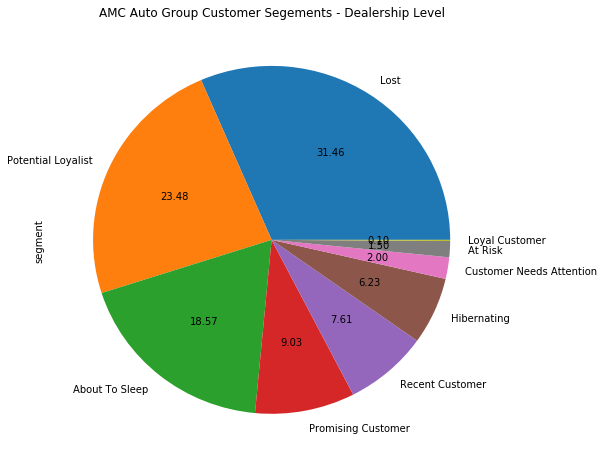

In [94]:
sctoyota_data = merged_data_amc[merged_data_amc.dealershipcode=='sctoyota']
sctoyota_data[sctoyota_data.computation_scope=='dealership'].segment.value_counts()
.plot(kind='pie',autopct='%1.2f',figsize=(8,8),
      title='AMC Auto Group Customer Segements - Dealership Level')

### SC Toyota - Customers who don't have contact information

In [87]:
ps_cust_with_no_contact_data=sctoyota_data[sctoyota_data.ext_source_id.isna()==True].shape[0]
ps_total_cust=sctoyota_data.shape[0]
print('Total no.of customers in SC Toyota {} :: '.format(ps_total_cust))
print('No.of Customer who don\'t have contact information {} , {}%'.
      format(ps_cust_with_no_contact_data, ps_cust_with_no_contact_data*100/ps_total_cust))

Total no.of customers in SC Toyota 103579 :: 
No.of Customer who don't have contact information 35559 , 34.33031792158642%


#### SC Toyota Customer Segments at Dealership Level Data Export

In [106]:
sctoyota_data[sctoyota_data.ext_source_id.isna()==False].to_csv('sctoyota_customer_segments.csv',index=False)

### Toyota Sunnyvale - Dealership Level - Customer Segments

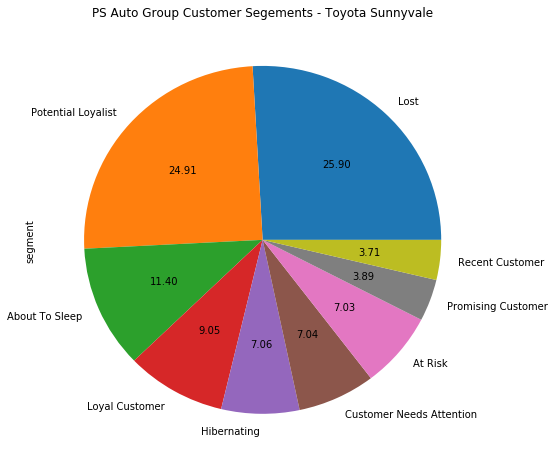

In [79]:
toyotasunnyvale = merged_data_ps[merged_data_ps.dealershipcode=='toyotasunnyvale']
toyotasunnyvale[toyotasunnyvale.computation_scope=='dealership'].
segment.value_counts().plot(kind='pie',autopct='%1.2f',figsize=(8,8),
                            title='PS Auto Group Customer Segements - Toyota Sunnyvale')

### Toyota Sunnyvale - Customers who don't have contact information

In [85]:
ts_cust_with_no_contact_data=toyotasunnyvale[toyotasunnyvale.ext_source_id.isna()==True].shape[0]
ts_total_cust=toyotasunnyvale.shape[0]
print('Total no.of customers in Toyota Sunnyvale {} :: '.format(ts_total_cust))
print('No.of Customer who don\'t have contact information {} , {}%'.
      format(ts_cust_with_no_contact_data, ts_cust_with_no_contact_data*100/ts_total_cust))

Total no.of customers in Toyota Sunnyvale 60712 :: 
No.of Customer who don't have contact information 3078 , 5.069837923310054%


#### Toyota Sunnyvale Customer Segments at Dealership Level Data Export

In [107]:
toyotasunnyvale[toyotasunnyvale.ext_source_id.isna()==False].to_csv('toyotasunnyvale_customer_segments.csv',index=False)